<a href="https://colab.research.google.com/github/swayangshreesamal/volatility-risk-forecasting/blob/main/05_risk_signals_decision_engine.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
from google.colab import drive
drive.mount('/content/drive')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
df = pd.read_csv(
    "/content/drive/My Drive/volatility-risk-forecasting/DATA/PROCESSED/volatility_forecasts.csv",
    parse_dates=["Date"],
    index_col="Date"
)

df.head()


,Close,High,Low,Open,Volume,log_return,volatility_14d,vol_7d,vol_14d,vol_30d,...,vol_14d_annualized,vol_30d_annualized,return_14d,risk_rgime,vol_regime,target_vol,predicted_risk_regime,future_vol_14d,baseline_forecast,regime_forecast
Date,,,,,,,,,,,,,,,,,,,,,
2007-12-06,5954.700195,6027.049805,5919.799805,5941.049805,0,0.002472,0.017574,0.012577,0.017574,0.017307,...,0.278980,0.274739,0.008068,Medium Risk,Medium Volatility,0.017588,0.017030,0.018834,0.017574,0.018834
2007-12-07,5974.299805,6042.100098,5894.799805,5963.600098,0,0.003286,0.017588,0.009059,0.017588,0.017194,...,0.279204,0.272948,0.011219,Medium Risk,Medium Volatility,0.016405,0.016720,0.018957,0.017588,0.018957
2007-12-10,5960.600098,6015.299805,5923.350098,5974.000000,0,-0.002296,0.016405,0.009816,0.016405,0.016731,...,0.260414,0.265598,0.030612,Medium Risk,Medium Volatility,0.012312,0.015651,0.018921,0.016405,0.018921
2007-12-11,6097.250000,6111.200195,5960.399902,5960.399902,0,0.022667,0.012312,0.009860,0.012312,0.016009,...,0.195445,0.254138,0.092051,Medium Risk,Medium Volatility,0.011642,0.011784,0.018029,0.012312,0.018029
2007-12-12,6159.299805,6175.649902,6005.450195,6067.049805,0,0.010125,0.011642,0.009027,0.011642,0.016029,...,0.184816,0.254458,0.109703,Medium Risk,Low Volatility,0.013051,0.011045,0.017835,0.011642,0.017835


In [5]:
low_thresh = df['regime_forecast'].quantile(0.33)
high_thresh = df['regime_forecast'].quantile(0.66)

low_thresh, high_thresh


(np.float64(0.0072140511783354115), np.float64(0.010517406034312884))

In [6]:
def risk_signal(vol):
    if vol < low_thresh:
        return "Risk-On"
    elif vol < high_thresh:
        return "Neutral"
    else:
        return "Risk-Off"

df['risk_signal'] = df['regime_forecast'].apply(risk_signal)

df[['regime_forecast', 'risk_signal']].head()


,regime_forecast,risk_signal
Date,,
2007-12-06,0.018834,Risk-Off
2007-12-07,0.018957,Risk-Off
2007-12-10,0.018921,Risk-Off
2007-12-11,0.018029,Risk-Off
2007-12-12,0.017835,Risk-Off


In [7]:
df['risk_signal'].value_counts(normalize=True)


,proportion
risk_signal,
Risk-Off,0.340032
Risk-On,0.330097
Neutral,0.329871


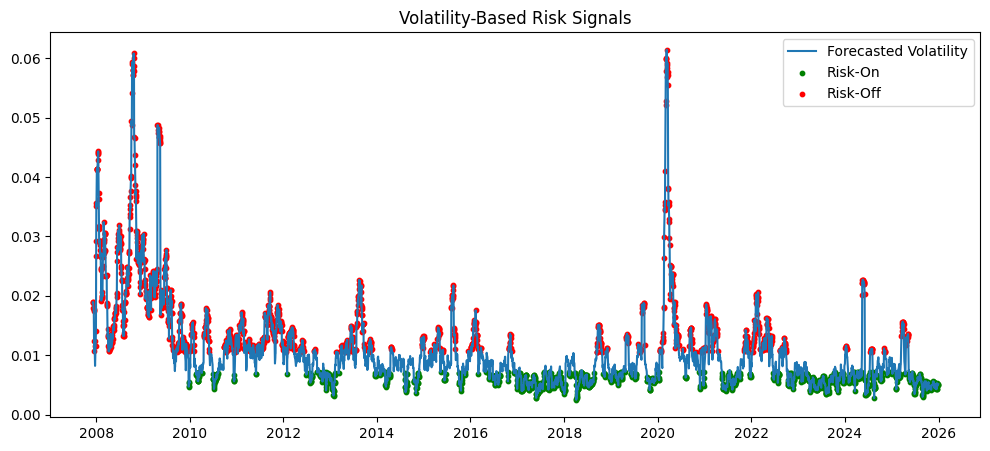

In [8]:
plt.figure(figsize=(12,5))
plt.plot(df.index, df['regime_forecast'], label='Forecasted Volatility')

risk_on = df[df['risk_signal'] == 'Risk-On']
risk_off = df[df['risk_signal'] == 'Risk-Off']

plt.scatter(risk_on.index, risk_on['regime_forecast'], color='green', label='Risk-On', s=10)
plt.scatter(risk_off.index, risk_off['regime_forecast'], color='red', label='Risk-Off', s=10)

plt.legend()
plt.title("Volatility-Based Risk Signals")
plt.show()


In [9]:
output_path = "/content/drive/My Drive/volatility-risk-forecasting/DATA/PROCESSED/volatility_risk_signals.csv"
df.to_csv(output_path)

print("volatility_risk_signals.csv saved successfully")


volatility_risk_signals.csv saved successfully
